# Meet Sable

## The Sparks Foundation : Buisness and Analytics Internship

Batch: 2022

In [66]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Importing Dataset

In [5]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Dividing features and labels to X and Y and processing Y 

In [40]:
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].to_numpy()
Y = df["Species"].to_numpy()
# replace species with numbers
Y = np.where(Y == "Iris-setosa", 0,
                np.where(Y == "Iris-versicolor", 1, 2))

## Applying kmeans with various number of clusters and plotting the elbow graph to find optimal number

Text(0.5, 1.0, 'Elbow method')

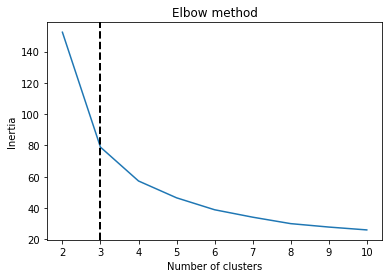

In [49]:
kmeans_interia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    kmeans_interia.append(kmeans.inertia_)

plt.plot(range(2, 11), kmeans_interia)
plt.axvline(x=3, color='black', linestyle='dashed', linewidth=2)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')

- We can see the elbow shape at n_clusters = 3
- 3 will be the optimal number of clusters

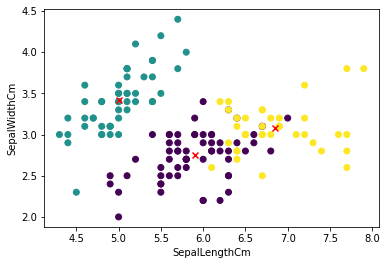

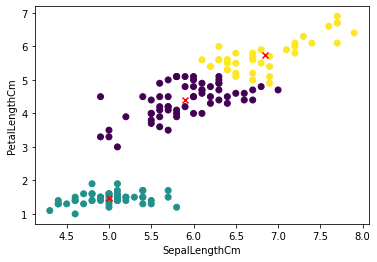

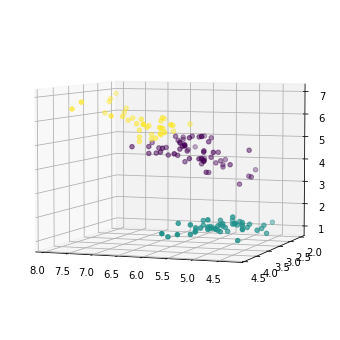

In [95]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

plt.figure()
plt.scatter(X[:, 0], X[:, 2], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], marker='x', c='red')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')

f = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d', elev=5, azim=110)
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_)
